# Part 4.1  Supervised Learning <br>
1.   Naive Bayes
2.   KNN
3.   SVM
4.   Decision Tree


## About the instructor: 
    
**Dr Vijayakumar**

AIRASIA ACADEMY, 
    
vijaymmu@gmail.com

## Demo : [IRIS](https://archive.ics.uci.edu/ml/datasets/Iris) dataset 

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
import pandas as pd

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [2]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

### Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [8]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_model)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [9]:
# Fatin and Mardhiatul
from sklearn.metrics import confusion_matrix 
confusion_matrix(ytest, y_model)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


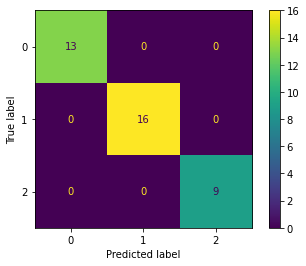

In [20]:
#Fei Zhi
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest, y_model)

print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report
#F1 score = 2 / [ (1/precision) + (1/ recall)]
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**Meaning of f1-score  and  support** <br>
The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.<br>

The support is the number of samples of the true response that lie in that class.

In [11]:
flowerlabel= y_iris.unique
flowerlabel

<bound method Series.unique of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

In [12]:
#labels = ['business', 'health']
#cm = confusion_matrix(y_test, pred, labels)

#Fei Zhi
import matplotlib.pyplot as plt
from sklearn import metrics
flowerlabel= y_iris.unique
confmatrix = confusion_matrix(ytest, y_model,flowerlabel)

print(confmatrix)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

confmatrix.plot()
plt.show()

TypeError: ignored

GaussianNB: (shhh.... I am **naive** but I am **smart**!)

### k-NN Classifier

more [info](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn 

KNeighborsClassifier()

In [14]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [15]:
knn.score(Xtest, ytest)

1.0

In [16]:
from sklearn.metrics import accuracy_score

y_model = knn.predict(Xtest) 
accuracy_score(ytest, y_model)

1.0

knn: hahaha, I am smarter than you, GaussianNB!

Pros and Cons of KNN

**Pros**

One of the most attractive features of the K-nearest neighbor algorithm is that is **simple to understand and easy to implement**. 

**Cons**

One of the obvious drawbacks of the KNN algorithm is the **computationally expensive** testing phase which is impractical in industry settings. Furthermore, KNN can suffer from **skewed class** distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.

### SVM
 “Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)


clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of RBF SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RBF SVC classifier on training set: 0.90
Accuracy of RBF SVC classifier on test set: 0.94


In [ ]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [ ]:
X_cancer

In [ ]:
y_cancer

#### C parameter

Try the following codes, express your findings.

In [ ]:
clf = SVC(kernel='rbf', C=10000).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of RBF SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### MinMaxScaler

SVM is sensitive to distance/length. Try the following codes and express your findings. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=100).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

### Decision Tree



In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import plot_tree

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, ytrain)



clf.fit(Xtrain, ytrain)   

In [ ]:
tree.plot_tree(clf.fit(Xtrain, ytrain) )

In [ ]:
clf.score(Xtest, ytest)